## Question #2

Chatbot summary: https://chatgpt.com/share/673e7f69-6774-8004-96a8-8a964c29f5d5

A real life application appropiate for...

1) Accuracy: Spam Email Detection. 

Accuracy measures the proportion of correct predictions out of all the predictions that were made. This includes actual positive and negative results (true positives and true negatives, respectively). Identifying emails that are either spam or not spam is crucial as you do not want an important email to be flagged as spam, and vice versa, you don't want a suspicious email being exposed to you. 



2) Sensitivity: Cancer Screening. 

Sensitivity is the model's ability to CORRECTLY classify positive cases (true positives). The goal is to make sure the model doesn't classify a concerning number of false negatives. It is important to not have any false negatives (a patient who actually has cancer but is concluded to not have anything) during cancer screening as this could result in the patient not getting sufficient care. This is much more concerning than spending unnecessary money on a false positive. 


3) Specificity: Fraud Detection in Credit Card transactions. 

Specificity measures the model's ability to CORRECTLY classify negative cases (true negatives). This metric's goal is to to make sure the model doesn't classify an overwhelming number of false positives. It is crucial to avoid restricting a customer from using their credit card after being falsely classified as a fraud. This makes it so that customers can use their credit card at necessary times safely. 


4) Precision: Product Recommendation System

Precision is the proportion of positive predictions that are indeed true. It is similar to sensitivity, which also emphasizes the number of correctly classified positive cases. However, precision focuses on minimizing false positives rather than false negatives. For product recomendations, like your netflix feed, aims to advertise shows/movies that are relevant to your previous interests (true positives). Yet, if they promote a lot of movies that do not align with your interests (false positives), then you will most likely begin to feel unsatisfied with Netflix. 

## Question #4

Chat summary: https://chatgpt.com/share/673ad907-a12c-8004-8e95-1bfd126540eb

Code below:

ab_reduced_noNaN_train size:  255
ab_reduced_noNaN_test size:  64


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\nsamples = 204\nvalue = [154, 50]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 5.47\nsamples = 143\nvalue = [128, 15]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'samples = 4\nvalue = [2, 2]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'samples = 139\nvalue = [126, 13]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 29.225\nsamples = 61\nvalue = [26, 35]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'samples = 45\nvalue = [15, 30]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'samples = 16\nvalue = [11, 5]\nclass = Paperback')]

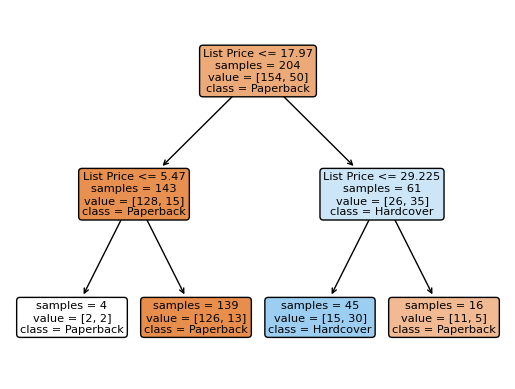

In [13]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# from question 3
ab = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
ab = ab.dropna()
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')
#print(ab)

# for question 4
ab_reduced_noNaN_train = ab.sample(frac = 0.8, random_state = 42)
ab_reduced_noNaN_test = ab.drop(ab_reduced_noNaN_train.index)

#print(ab_reduced_noNaN_train)
print('ab_reduced_noNaN_train size: ', len(ab_reduced_noNaN_train))
print('ab_reduced_noNaN_test size: ', len(ab_reduced_noNaN_test))


# Constructing the tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Define X (features) and y (target)
X = ab_reduced_noNaN_train[['List Price']]  # Use only the 'List Price' column as the feature
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target: 'Hard' category (1 for hardcover, 0 for paperback)

# 2. Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# 4. Train the classifier on the training data using the fit method
clf.fit(X_train, y_train)

# 5. Make predictions on the test data
y_pred = clf.predict(X_test)

# 6. Evaluate the model's performance (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Tree visualization 

tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True, rounded=True, impurity=False, proportion=False)



### What clf is predicting:

Based on the output of tree.plot_tree(clf...), the fitted clf model is predicting whether or not a book is hard or paper covered based on the price of the book. 

### Test and training set sizes:


- ab_reduced_noNaN_train size:  255
- ab_reduced_noNaN_test size:  64

### y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
- Overall, this line of code will assign y as a dummy variable because of pd.get_dummies. More specifically, python will select the column ["Hard_or_Paper"] and will convert the categories, intuitively, hard or paper into a binary context rather than a categorical context. The category 'Hard' will be represented by 1, and 'Paper' will be represented by 0. Then, 'Hard' and 'Paper' labelled columns are made, under which are rows of either 0 or 1. ['H'] focuses in on what is under the 'Hard' category. Thus, if y = 0, then 'Paper' is representative; if y = 1, then 'Hard' is representative. 

### X = ab_reduced_noNaN[['List Price']]
- Overall, this line of code assigns X as a feature variable. It takes all the values under the "List price" column as a dataframe (indicated by the double square brackets) and thus will output a 2D data frame. 

## Question #6

Chatbot summary: https://chatgpt.com/share/673e8097-7d3c-8004-bf94-93bd763e6212

### Results for clf (using 'List Price'):
Accuracy: 0.8431
Sensitivity: 0.6316
Specificity: 0.9688


### Results for clf2 (using 'NumPages', 'Thick', 'List Price'):
Accuracy: 0.8627
Sensitivity: 0.6842
Specificity: 0.9688

Code is provided below:

Results for clf (using 'List Price'):
Accuracy: 0.8431
Sensitivity: 0.6316
Specificity: 0.9688


Results for clf2 (using 'NumPages', 'Thick', 'List Price'):
Accuracy: 0.8627
Sensitivity: 0.6842
Specificity: 0.9688


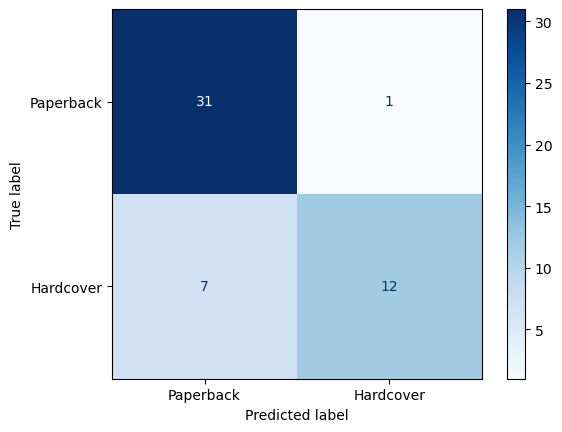

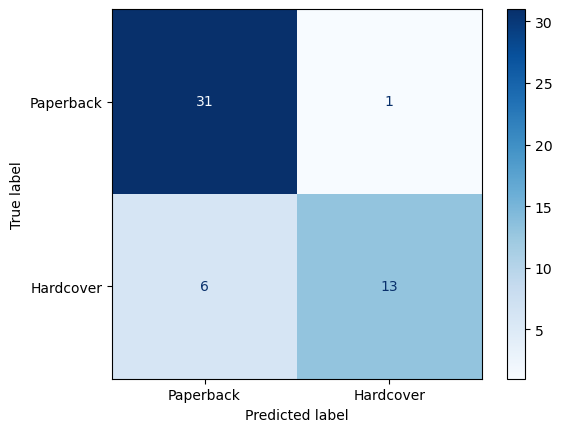

In [6]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Load dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing the dataset
ab = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
ab = ab.dropna()
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Splitting the dataset into training and testing sets
ab_reduced_noNaN_train = ab.sample(frac=0.8, random_state=42)
ab_reduced_noNaN_test = ab.drop(ab_reduced_noNaN_train.index)

# clf - Using only 'List Price' for prediction
X_clf = ab_reduced_noNaN_train[['List Price']]
y_clf = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']

# Split the data into training and testing sets for clf
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Initialize and train clf (Decision Tree with max_depth=2)
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Predict using clf
y_pred_clf = clf.predict(X_test_clf)

# clf2 - Using 'NumPages', 'Thick', and 'List Price' for prediction
X_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y_clf2 = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']

# Split the data into training and testing sets for clf2
X_train_clf2, X_test_clf2, y_train_clf2, y_test_clf2 = train_test_split(X_clf2, y_clf2, test_size=0.2, random_state=42)

# Initialize and train clf2 (Decision Tree with max_depth=4)
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train_clf2)

# Predict using clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrix for clf
conf_matrix_clf = confusion_matrix(y_test_clf, y_pred_clf)
cm_display_clf = ConfusionMatrixDisplay(conf_matrix_clf, display_labels=['Paperback', 'Hardcover'])
cm_display_clf.plot(cmap='Blues', values_format='d')

# Confusion matrix for clf2
conf_matrix_clf2 = confusion_matrix(y_test_clf2, y_pred_clf2)
cm_display_clf2 = ConfusionMatrixDisplay(conf_matrix_clf2, display_labels=['Paperback', 'Hardcover'])
cm_display_clf2.plot(cmap='Blues', values_format='d')

# Function to calculate Sensitivity, Specificity, and Accuracy
def evaluate_model(conf_matrix):
    TP = conf_matrix[1, 1]  # True Positives
    TN = conf_matrix[0, 0]  # True Negatives
    FP = conf_matrix[0, 1]  # False Positives
    FN = conf_matrix[1, 0]  # False Negatives
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)  # True Positive Rate
    specificity = TN / (TN + FP)  # True Negative Rate
    
    return accuracy, sensitivity, specificity

# Evaluate clf
accuracy_clf, sensitivity_clf, specificity_clf = evaluate_model(conf_matrix_clf)

# Evaluate clf2
accuracy_clf2, sensitivity_clf2, specificity_clf2 = evaluate_model(conf_matrix_clf2)

# Print results
print(f"Results for clf (using 'List Price'):")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print("\n")

print(f"Results for clf2 (using 'NumPages', 'Thick', 'List Price'):")
print(f"Accuracy: {accuracy_clf2:.4f}")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")


## Question #7

Chatgpt summary: https://chatgpt.com/share/673e80bb-19c4-8004-98d3-4014154954d9

The confusion matrices provided appear different because they are using different predictor variables. The first confusion matrix is using List Price as a predictor variable, thus whether the book is hard or paper covered depends on the book price. However, the second confusion matrix has more predictor variables, such as NumPages, Thick, and List Price. The second matrix is more complex as it involves multiple predictor variables, but it may not be a better model for the Amazon books dataset as we must confirm that these additional variables actually contribute to the correct prediction regarding whether or not the book is paper or hard. 

The reason why Clf and Clf2 are better confusion matrices is because they test or evaulate the created model using the test data, which is data the model hasn't seen before. Thus, it's performance is more authentic and shows whether or not the model reflects generalization. Meanwhile, the provided confusion matrices evaluate the model on (training) data it has already seen, which can lead to misleading results about the accuracy of the model's predictions. 

Below is the code from Question #7 for me to visualize the confusion matrix.

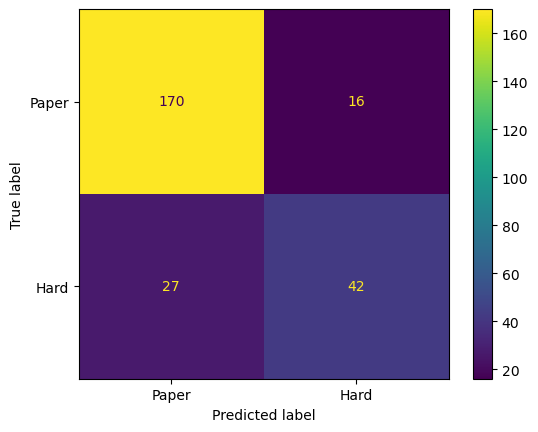

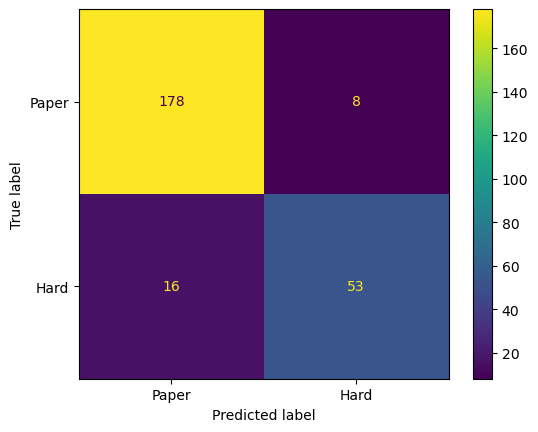

In [8]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Load dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing the dataset
ab = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
ab = ab.dropna()
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Add a binary column for life_exp_good
ab['life_exp_good'] = (ab['Hard_or_Paper'] == 'H').astype(int)

# Splitting the dataset into training and testing sets
ab_reduced_noNaN_train = ab.sample(frac=0.8, random_state=42)
ab_reduced_noNaN_test = ab.drop(ab_reduced_noNaN_train.index)

# clf - Using only 'List Price' for prediction
X_clf = ab_reduced_noNaN_train[['List Price']]
y_clf = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']

# Split the data into training and testing sets for clf
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Initialize and train clf (Decision Tree with max_depth=2)
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Predict using clf
y_pred_clf = clf.predict(X_test_clf)

# clf2 - Using 'NumPages', 'Thick', and 'List Price' for prediction
X_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y_clf2 = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']

# Split the data into training and testing sets for clf2
X_train_clf2, X_test_clf2, y_train_clf2, y_test_clf2 = train_test_split(X_clf2, y_clf2, test_size=0.2, random_state=42)

# Initialize and train clf2 (Decision Tree with max_depth=4)
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train_clf2)

# Predict using clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrix for clf (trained with 'List Price')
ConfusionMatrixDisplay(
    confusion_matrix(
        ab_reduced_noNaN_train['life_exp_good'], 
        clf.predict(ab_reduced_noNaN_train[['List Price']]), 
        labels=[0, 1]
    ), 
    display_labels=["Paper", "Hard"]
).plot()

# Confusion matrix for clf2 (trained with 'NumPages', 'Thick', 'List Price')
ConfusionMatrixDisplay(
    confusion_matrix(
        ab_reduced_noNaN_train['life_exp_good'], 
        clf2.predict(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]), 
        labels=[0, 1]
    ), 
    display_labels=["Paper", "Hard"]
).plot()
